# 0.) Import the Credit Card Fraud Data From CCLE

In [7]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('W5_fraudTest.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   city_pop                 555719 non-null  int64  
 2   time_var                 555719 non-null  int64  
 3   category_entertainment   555719 non-null  bool   
 4   category_food_dining     555719 non-null  bool   
 5   category_gas_transport   555719 non-null  bool   
 6   category_grocery_net     555719 non-null  bool   
 7   category_grocery_pos     555719 non-null  bool   
 8   category_health_fitness  555719 non-null  bool   
 9   category_home            555719 non-null  bool   
 10  category_kids_pets       555719 non-null  bool   
 11  category_misc_net        555719 non-null  bool   
 12  category_misc_pos        555719 non-null  bool   
 13  category_personal_care   555719 non-null  bool   
 14  cate

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [19]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

   over_log_score  under_log_score  smote_log_score
0        0.922359         0.925898         0.920943


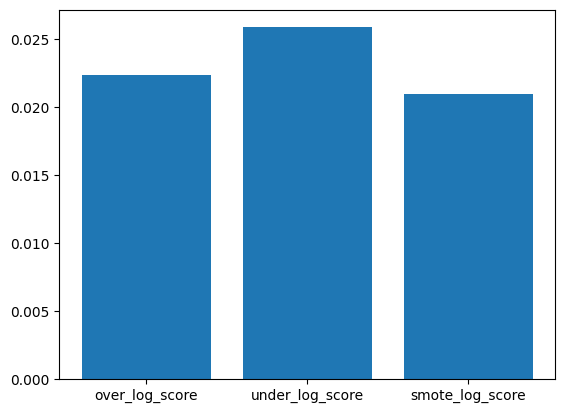

In [24]:
over_log_score = over_log.score(X_test, y_test)
under_log_score = under_log.score(X_test, y_test)
smote_log_score = smote_log.score(X_test, y_test)
print(pd.DataFrame({"over_log_score": over_log_score, "under_log_score": under_log_score, "smote_log_score": smote_log_score}, index = [0]))

from matplotlib import pyplot as plt
plt.bar(["over_log_score", "under_log_score", "smote_log_score"], np.array([over_log_score, under_log_score, smote_log_score])-0.9)
plt.show()

# 5.) Which performed best in Out of Sample metrics?

The smote performs the best. hehe.

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_true = y_test

In [29]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76648,  6398],
       [   74,   238]])

In [30]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7628205128205128


In [31]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76946,  6100],
       [   77,   235]])

In [32]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7532051282051282


In [33]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76529,  6517],
       [   73,   239]])

In [34]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7660256410256411


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [37]:
X_train_df = pd.DataFrame(X_train,columns=X.columns)
y_train_df = pd.DataFrame(y_train,columns=["is_fraud"])

In [39]:
raw_temp = pd.concat([X_train_df, y_train_df], axis =1)

In [40]:
X_train_df

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0.490002,-0.290755,0.491095,-0.278467,-0.275643,-0.336441,-0.190314,-0.322596,-0.265875,-0.322207,-0.310544,-0.227859,-0.258218,-0.275481,-0.284889,3.188526,-0.180265
1,-0.304952,0.395037,1.589322,-0.278467,-0.275643,-0.336441,-0.190314,-0.322596,-0.265875,3.103590,-0.310544,-0.227859,-0.258218,-0.275481,-0.284889,-0.313625,-0.180265
2,-0.079515,0.121598,-0.838337,3.591092,-0.275643,-0.336441,-0.190314,-0.322596,-0.265875,-0.322207,-0.310544,-0.227859,-0.258218,-0.275481,-0.284889,-0.313625,-0.180265
3,0.018307,-0.277929,0.722301,-0.278467,-0.275643,2.972286,-0.190314,-0.322596,-0.265875,-0.322207,-0.310544,-0.227859,-0.258218,-0.275481,-0.284889,-0.313625,-0.180265
4,-0.083967,0.151744,-1.069543,-0.278467,-0.275643,-0.336441,-0.190314,-0.322596,-0.265875,-0.322207,-0.310544,-0.227859,3.872702,-0.275481,-0.284889,-0.313625,-0.180265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388998,0.229536,-0.286496,1.011308,-0.278467,-0.275643,-0.336441,-0.190314,3.099851,-0.265875,-0.322207,-0.310544,-0.227859,-0.258218,-0.275481,-0.284889,-0.313625,-0.180265
388999,0.132106,-0.291116,0.086485,-0.278467,-0.275643,-0.336441,-0.190314,-0.322596,-0.265875,3.103590,-0.310544,-0.227859,-0.258218,-0.275481,-0.284889,-0.313625,-0.180265
389000,-0.419863,0.015523,-0.838337,-0.278467,-0.275643,-0.336441,-0.190314,-0.322596,-0.265875,-0.322207,-0.310544,4.388687,-0.258218,-0.275481,-0.284889,-0.313625,-0.180265
389001,0.869441,-0.281793,-0.144720,-0.278467,-0.275643,-0.336441,-0.190314,3.099851,-0.265875,-0.322207,-0.310544,-0.227859,-0.258218,-0.275481,-0.284889,-0.313625,-0.180265


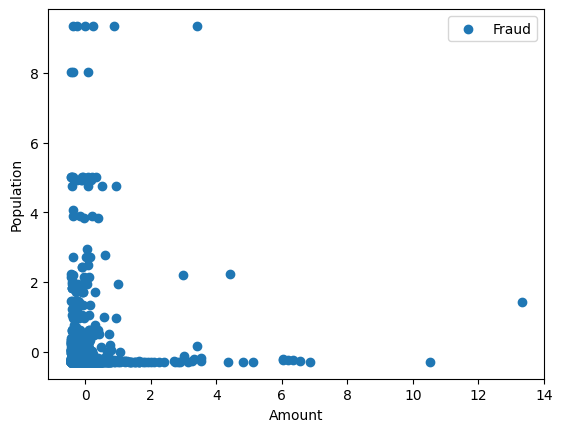

In [44]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"],
            raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [45]:
smote_X_df = pd.DataFrame(smote_X,columns=X.columns)
smote_y_df = pd.DataFrame(smote_y,columns=["is_fraud"])
raw_temp = pd.concat([smote_X_df, smote_y_df], axis =1)

In [48]:

raw_temp = pd.concat([smote_X_df, smote_y_df], axis =1)


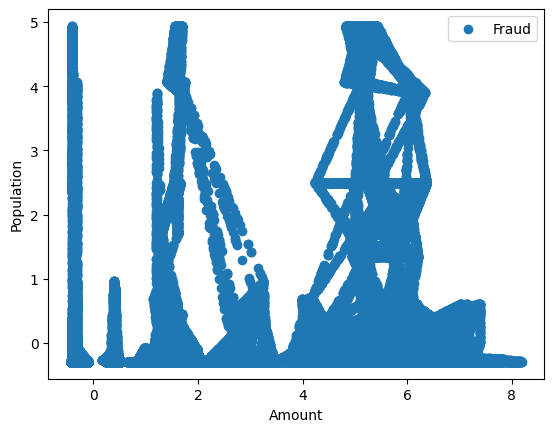

In [50]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [52]:
resampling_method ={
    'over': RandomOverSampler(),
    'under':RandomUnderSampler(),
    'smote':SMOTE()
}
model_configs={
    'LOG':LogisticRegression(),
    'LASSO':LogisticRegression(penalty = 'l1',
                              C= 2., solver ='liblinear'),
    "DTREE": DecisionTreeClassifier()
}

In [53]:
def calc_perfmetric(y_true, y_pred):
    tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity=tp/(tp+fn) 
    specificity= tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return(sensitivity, specificity, precision, recall, f1)

In [54]:
trained_models = {}
results =[]

In [55]:
for resample_key, resampler in resampling_method.items():
    resample_X, resample_y = resampler.fit_resample(X_train,y_train)
   
    for model_key, model in model_configs.items():
        conbined_key = f'{resample_key}_{model_key}'
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[conbined_key] = m
        
        y_pred = m.predict(X_test)
       
        sensitivity,specificity,precision,recall,f1 = calc_perfmetric(y_true, y_pred)
        
        results.append({'Model': conbined_key,
                       "Sensitivity": sensitivity,
                       'specificity':specificity,
                       'precision':precision,
                       'recall':recall,
                       'f1':f1})
        
        

In [56]:
results_df = pd.DataFrame(results)

In [57]:
#split the model name into two columns
results_df[['resample','model']] = results_df['Model'].str.split('_', expand=True)

#reset a dual index for dataframe
results_df.set_index(['resample','model'], inplace=True)
results_df.drop('Model', axis=1, inplace=True)
results_df

Sensitivity  specificity  precision    recall        f1
resample model                                                         
over     LOG       0.762821     0.924524   0.036582  0.762821  0.069815
         LASSO     0.762821     0.924403   0.036525  0.762821  0.069713
         DTREE     0.528846     0.998627   0.591398  0.528846  0.558376
under    LOG       0.762821     0.904426   0.029113  0.762821  0.056086
         LASSO     0.762821     0.904053   0.029003  0.762821  0.055882
         DTREE     0.967949     0.946391   0.063525  0.967949  0.119226
smote    LOG       0.766026     0.923982   0.036477  0.766026  0.069639
         LASSO     0.766026     0.924042   0.036505  0.766026  0.069689
         DTREE     0.669872     0.992980   0.263889  0.669872  0.378623

Text(0.5, 1.0, 'Performance Metrics')

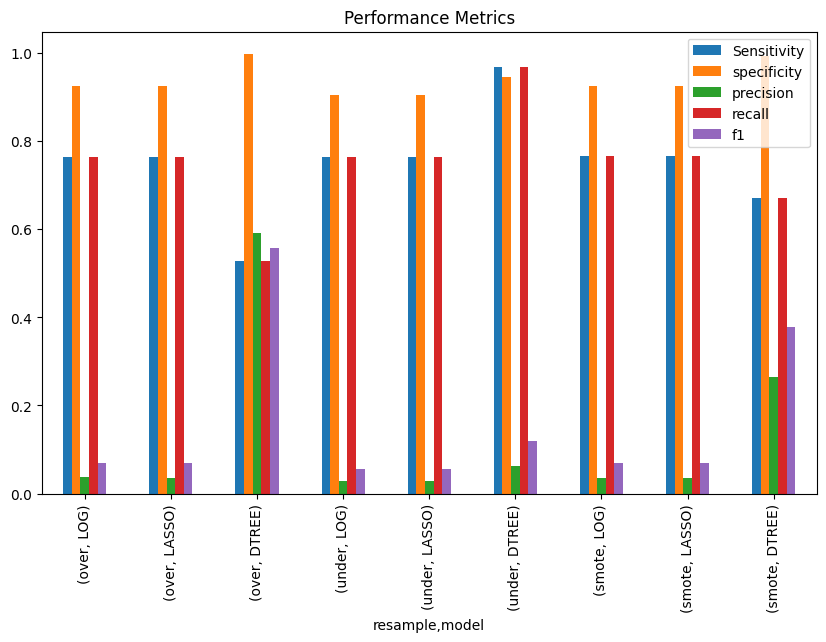

In [58]:
results_df_final = results_df
results_df_final.plot(kind='bar', figsize=(10,6))
plt.title('Performance Metrics')

Based on the result, the (under,decision tree) combination will perform the best with highest sensitivity. For the case of the fraud, the sensitivity is more valued than other performance metrics, so this combination is the best choice.